In [66]:
import os
import requests
from   dotenv import load_dotenv
import pandas as pd
import pandas_datareader as web
import datetime as dt
import numpy as np
from   MCForecastTools import MCSimulation
import alpaca_trade_api as tradeapi
from sqlalchemy import inspect, create_engine

In [6]:
#set dates for data pull
historical_start_date = dt.datetime(2016,8,1)
historical_end_date = dt.datetime(2021,7,31)

#pull data for the Phase 4 cryptocurrencies, plus S&P500
ADA_df   = web.DataReader('ADA-USD','yahoo',historical_start_date,historical_end_date)
BCH_df   = web.DataReader('BCH-USD','yahoo',historical_start_date,historical_end_date)
BNB_df   = web.DataReader('BNB-USD','yahoo',historical_start_date,historical_end_date)
BTC_df   = web.DataReader('BTC-USD','yahoo',historical_start_date,historical_end_date)
DOGE_df  = web.DataReader('DOGE-USD','yahoo',historical_start_date,historical_end_date)
EOS_df   = web.DataReader('EOS-USD','yahoo',historical_start_date,historical_end_date)
ETC_df   = web.DataReader('ETC-USD','yahoo',historical_start_date,historical_end_date)
ETH_df   = web.DataReader('ETH-USD','yahoo',historical_start_date,historical_end_date)
FIL_df   = web.DataReader('FIL-USD','yahoo',historical_start_date,historical_end_date)
LINK_df  = web.DataReader('LINK-USD','yahoo',historical_start_date,historical_end_date)
LTC_df   = web.DataReader('LTC-USD','yahoo',historical_start_date,historical_end_date)
MKR_df   = web.DataReader('MKR-USD','yahoo',historical_start_date,historical_end_date)
THETA_df = web.DataReader('THETA-USD','yahoo',historical_start_date,historical_end_date)
TRX_df   = web.DataReader('TRX-USD','yahoo',historical_start_date,historical_end_date)
VET_df   = web.DataReader('VET-USD','yahoo',historical_start_date,historical_end_date)
XLM_df   = web.DataReader('XLM-USD','yahoo',historical_start_date,historical_end_date)
XMR_df   = web.DataReader('XMR-USD','yahoo',historical_start_date,historical_end_date)
XRP_df   = web.DataReader('XRP-USD','yahoo',historical_start_date,historical_end_date)
SPX_df   = web.DataReader('sp500','fred',historical_start_date,historical_end_date)

#if duplicate rows exist, keep the first and delete the other(s)
ADA_df   = ADA_df.loc[~ADA_df.index.duplicated(keep='first')]
BCH_df   = BCH_df.loc[~BCH_df.index.duplicated(keep='first')]
BNB_df   = BNB_df.loc[~BNB_df.index.duplicated(keep='first')]
BTC_df   = BTC_df.loc[~BTC_df.index.duplicated(keep='first')]
DOGE_df  = DOGE_df.loc[~DOGE_df.index.duplicated(keep='first')]
EOS_df   = EOS_df.loc[~EOS_df.index.duplicated(keep='first')]
ETC_df   = ETC_df.loc[~ETC_df.index.duplicated(keep='first')]
ETH_df   = ETH_df.loc[~ETH_df.index.duplicated(keep='first')]
FIL_df   = FIL_df.loc[~FIL_df.index.duplicated(keep='first')]
LINK_df  = LINK_df.loc[~LINK_df.index.duplicated(keep='first')]
LTC_df   = LTC_df.loc[~LTC_df.index.duplicated(keep='first')]
MKR_df   = MKR_df.loc[~MKR_df.index.duplicated(keep='first')]
THETA_df = THETA_df.loc[~THETA_df.index.duplicated(keep='first')]
TRX_df   = TRX_df.loc[~TRX_df.index.duplicated(keep='first')]
VET_df   = VET_df.loc[~VET_df.index.duplicated(keep='first')]
XLM_df   = XLM_df.loc[~XLM_df.index.duplicated(keep='first')]
XMR_df   = XMR_df.loc[~XMR_df.index.duplicated(keep='first')]
XRP_df   = XRP_df.loc[~XRP_df.index.duplicated(keep='first')]
SPX_df   = SPX_df.loc[~SPX_df.index.duplicated(keep='first')]


In [35]:
#create new dataframes, keeping only the daily closing prices
ADA_close_df   = ADA_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
BCH_close_df   = BCH_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
BNB_close_df   = BNB_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
BTC_close_df   = BTC_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
DOGE_close_df  = DOGE_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
EOS_close_df   = EOS_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
ETC_close_df   = ETC_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
ETH_close_df   = ETH_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
FIL_close_df   = FIL_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
LINK_close_df  = LINK_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
LTC_close_df   = LTC_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
MKR_close_df   = MKR_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
THETA_close_df = THETA_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
TRX_close_df   = TRX_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
VET_close_df   = VET_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
XLM_close_df   = XLM_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
XMR_close_df   = XMR_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
XRP_close_df   = XRP_df[['Close']].rename({'Close':'close'}, axis=1).reset_index()
SPX_close_df   = SPX_df[['sp500']].rename({'sp500':'close'}, axis=1).reset_index()


In [11]:
#merge all "close" dataframes into one
to_merge_dict = {'ADA': ADA_close_df,'BCH': BCH_close_df,'BNB': BNB_close_df,'BTC': BTC_close_df,'DOGE': DOGE_close_df,'EOS': EOS_close_df,
                 'ETC': ETC_close_df,'ETH': ETH_close_df,'FIL': FIL_close_df,'LINK': LINK_close_df,'LTC': LTC_close_df,'MKR': MKR_close_df,
                 'THETA': THETA_close_df,'TRX': TRX_close_df,'VET': VET_close_df,'XLM': XLM_close_df,'XMR': XMR_close_df,'XRP': XRP_close_df}
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())
merged_df = merged_df.dropna()
merged_df

ADA                  BCH                    BNB             \
           Date     close       Date       close       Date      close   
0    2017-09-30  0.024969 2017-07-22  413.059998 2017-07-24   0.105870   
1    2017-10-01  0.025932 2017-07-23  440.700989 2017-07-25   0.105138   
2    2017-10-02  0.020816 2017-07-24  406.897003 2017-07-26   0.107737   
3    2017-10-03  0.021931 2017-07-25  365.816010 2017-07-27   0.104067   
4    2017-10-04  0.021489 2017-07-26  385.479004 2017-07-28   0.107811   
...         ...       ...        ...         ...        ...        ...   
1074 2020-09-12  0.094856 2020-07-04  221.843277 2020-07-06  16.770226   
1075 2020-09-13  0.096769 2020-07-05  241.632095 2020-07-07  17.227657   
1076 2020-09-14  0.093496 2020-07-06  237.146729 2020-07-08  16.884869   
1077 2020-09-15  0.091650 2020-07-07  243.230209 2020-07-09  17.261251   
1078 2020-09-16  0.094217 2020-07-08  238.855850 2020-07-10  17.622179   

            BTC                     DOGE            ...        TRX            \
           Date         close       Date     close  ...       Date     close   
0    2016-07-31    606.271973 2016-07-31  0.000223  ... 2017-09-12  0.001988   
1    2016-08-01    547.465027 2016-08-01  0.000206  ... 2017-09-13  0.001427   
2    2016-08-02    566.354980 2016-08-02  0.000214  ... 2017-09-14  0.001801   
3    2016-08-03    578.289001 2016-08-03  0.000215  ... 2017-09-15  0.001831   
4    2016-08-04    575.043030 2016-08-04  0.000218  ... 2017-09-16  0.003320   
...         ...           ...        ...       ...  ...        ...       ...   
1074 2019-07-13  10256.058594 2019-07-13  0.003014  ... 2020-08-25  0.023747   
1075 2019-07-14  10895.089844 2019-07-14  0.003092  ... 2020-08-26  0.023100   
1076 2019-07-15   9477.641602 2019-07-15  0.002825  ... 2020-08-27  0.023981   
1077 2019-07-16   9693.802734 2019-07-16  0.003030  ... 2020-08-28  0.025038   
1078 2019-07-17  10666.482422 2019-07-17  0.003121  ... 2020-08-29  0.026952   

            VET                  XLM                  XMR             \
           Date     close       Date     close       Date      close   
0    2018-08-02  0.015307 2016-07-31  0.001874 2016-07-31   1.696270   
1    2018-08-03  0.013333 2016-08-01  0.001736 2016-08-01   1.485210   
2    2018-08-04  0.014081 2016-08-02  0.001804 2016-08-02   1.574810   
3    2018-08-05  0.013424 2016-08-03  0.001879 2016-08-03   1.849210   
4    2018-08-06  0.012899 2016-08-04  0.001900 2016-08-04   1.792560   
...         ...       ...        ...       ...        ...        ...   
1074 2021-07-27  0.082563 2019-07-13  0.086249 2019-07-13  85.917221   
1075 2021-07-28  0.082462 2019-07-14  0.086490 2019-07-14  89.496063   
1076 2021-07-29  0.085846 2019-07-15  0.078318 2019-07-15  74.016220   
1077 2021-07-30  0.089586 2019-07-16  0.080627 2019-07-16  76.458504   
1078 2021-07-31  0.085917 2019-07-17  0.088882 2019-07-17  84.121048   

            XRP            
           Date     close  
0    2016-07-31  0.005906  
1    2016-08-01  0.005690  
2    2016-08-02  0.005646  
3    2016-08-03  0.005816  
4    2016-08-04  0.006447  
...         ...       ...  
1074 2019-07-13  0.306426  
1075 2019-07-14  0.315310  
1076 2019-07-15  0.296726  
1077 2019-07-16  0.310613  
1078 2019-07-17  0.323176  

[1079 rows x 36 columns]

In [13]:
#create new dataframes for use in Monte Carlo simulations
ADA = {'ada': ADA_close_df}
BCH = {'bch': BCH_close_df}
BNB = {'bnb': BNB_close_df}
BTC = {'btc': BTC_close_df}
DOGE = {'doge': DOGE_close_df}
EOS = {'eos': EOS_close_df}
ETC = {'etc': ETC_close_df}
ETH = {'eth': ETH_close_df}
FIL = {'fil': FIL_close_df}
LINK = {'link': LINK_close_df}
LTC = {'ltc': LTC_close_df}
MKR = {'mkr': MKR_close_df}
THETA = {'theta': THETA_close_df}
TRX = {'trx': TRX_close_df}
VET = {'vet': VET_close_df}
XLM = {'xlm': XLM_close_df}
XMR = {'xmr': XMR_close_df}
XRP = {'xrp': XRP_close_df}
SPX = {'spx': SPX_close_df}
    

In [15]:
#set keys for individual Monte Carlo simulation dataframes
ADA_DF=pd.concat(ADA.values(), axis=1, keys=ADA.keys())
BCH_DF=pd.concat(BCH.values(), axis=1, keys=BCH.keys())
BNB_DF=pd.concat(BNB.values(), axis=1, keys=BNB.keys())
BTC_DF=pd.concat(BTC.values(), axis=1, keys=BTC.keys())
DOGE_DF=pd.concat(DOGE.values(), axis=1, keys=DOGE.keys())
EOS_DF=pd.concat(EOS.values(), axis=1, keys=EOS.keys())
ETC_DF=pd.concat(ETC.values(), axis=1, keys=ETC.keys())
ETH_DF=pd.concat(ETH.values(), axis=1, keys=ETH.keys())
FIL_DF=pd.concat(FIL.values(), axis=1, keys=FIL.keys())
LINK_DF=pd.concat(LINK.values(), axis=1, keys=LINK.keys())
LTC_DF=pd.concat(LTC.values(), axis=1, keys=LTC.keys())
MKR_DF=pd.concat(MKR.values(), axis=1, keys=MKR.keys())
THETA_DF=pd.concat(THETA.values(), axis=1, keys=THETA.keys())
TRX_DF=pd.concat(TRX.values(), axis=1, keys=TRX.keys())
VET_DF=pd.concat(VET.values(), axis=1, keys=VET.keys())
XLM_DF=pd.concat(XLM.values(), axis=1, keys=XLM.keys())
XMR_DF=pd.concat(XMR.values(), axis=1, keys=XMR.keys())
XRP_DF=pd.concat(XRP.values(), axis=1, keys=XRP.keys())
SPX_DF=pd.concat(SPX.values(), axis=1, keys=SPX.keys())


In [16]:
#consolidate all individual Monte Carle dataframes into one dataframe
portfolio = [ADA_DF,BNB_DF,BCH_DF,BTC_DF,DOGE_DF,EOS_DF,ETC_DF,ETH_DF,FIL_DF,LINK_DF,LTC_DF,MKR_DF,THETA_DF,TRX_DF,VET_DF,XLM_DF,XMR_DF,XRP_DF,SPX_DF]
portfolio

[            ada          
            Date     close
 0    2017-09-30  0.024969
 1    2017-10-01  0.025932
 2    2017-10-02  0.020816
 3    2017-10-03  0.021931
 4    2017-10-04  0.021489
 ...         ...       ...
 1388 2021-07-27  1.283504
 1389 2021-07-28  1.284084
 1390 2021-07-29  1.308952
 1391 2021-07-30  1.322345
 1392 2021-07-31  1.317730
 
 [1393 rows x 2 columns],
             bnb            
            Date       close
 0    2017-07-24    0.105870
 1    2017-07-25    0.105138
 2    2017-07-26    0.107737
 3    2017-07-27    0.104067
 4    2017-07-28    0.107811
 ...         ...         ...
 1456 2021-07-27  313.428650
 1457 2021-07-28  316.749451
 1458 2021-07-29  322.909363
 1459 2021-07-30  333.549591
 1460 2021-07-31  333.484009
 
 [1461 rows x 2 columns],
             bch            
            Date       close
 0    2017-07-22  413.059998
 1    2017-07-23  440.700989
 2    2017-07-24  406.897003
 3    2017-07-25  365.816010
 4    2017-07-26  385.479004
 ...         

In [18]:
#execute Monte Carlo simulations. run 1000 simulations per coin for 730 trading days (2 years).
cum_ret = []
for x in portfolio:
    coin_mcsim_equal = MCSimulation(portfolio_data = x, 
                               # weights = [1],
                                num_simulation = 1000,
                                num_trading_days = 730)

    #compile cumulative returns
    cumulative_return = coin_mcsim_equal.calc_cumulative_return().mean()
    #append each coin data
    cum_ret.append(cumulative_return.iloc[-1])

#create new dataframe to hold cumulative returns
cum_ret_df = pd.DataFrame(cum_ret)
cum_ret_df


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0
0,1.154722
1,6.885382
2,0.465509
3,3.952801
4,8.889752
5,3.320949
6,2.907518
7,2.706308
8,1.726482
9,67.797602


In [21]:
#rename index column
cum_ret_names=cum_ret_df.rename(index={0: 'ADA',1: 'BCH',2: 'BNB',3: 'BTC',4:'DOGE',5:'EOS',6:'ETC',7:'ETH',8:'FIL',9:'LNK',10:'LTC',11:'MKR',12:'THETA',13:'TRX',14:'VET',15:'XLM',16:'XMR',17:'XRP'})
#rename cumulative return column
cum_ret_names.columns=['Cumulative Return']
cum_ret_names

,Cumulative Return
ADA,1.154722
BCH,6.885382
BNB,0.465509
BTC,3.952801
DOGE,8.889752
EOS,3.320949
ETC,2.907518
ETH,2.706308
FIL,1.726482
LNK,67.797602


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 730 Trading Days.'}>

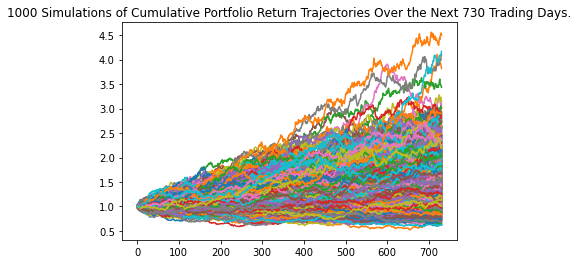

In [23]:
#plot last-run MC simulation
coin_mcsim_equal.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

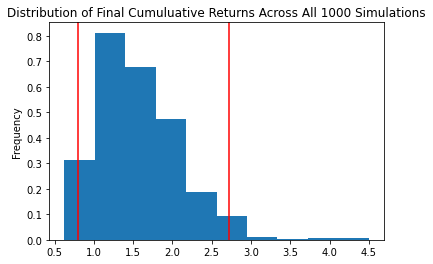

In [25]:
#show distribution for last-run MC simulation
coin_mcsim_equal.plot_distribution()

In [26]:
# summarize cumulative return for last-run MC simulation
coin_mcsim_equal.summarize_cumulative_return()

count           1000.000000
mean               1.565090
std                0.517889
min                0.623173
25%                1.200808
50%                1.477717
75%                1.886628
max                4.498281
95% CI Lower       0.796054
95% CI Upper       2.721306
Name: 730, dtype: float64

In [39]:
#recompile individual coin dataframes for concatentation
ADA_close_df   = ADA_df[['Close']].rename({'Close':'ADA_Close'}, axis=1)
BCH_close_df   = BCH_df[['Close']].rename({'Close':'BCH_Close'}, axis=1)
BNB_close_df   = BNB_df[['Close']].rename({'Close':'BNB_Close'}, axis=1)
BTC_close_df   = BTC_df[['Close']].rename({'Close':'BTC_Close'}, axis=1)
DOGE_close_df  = DOGE_df[['Close']].rename({'Close':'DOGE_Close'}, axis=1)
EOS_close_df   = EOS_df[['Close']].rename({'Close':'EOS_Close'}, axis=1)
ETC_close_df   = ETC_df[['Close']].rename({'Close':'ETC_Close'}, axis=1)
ETH_close_df   = ETH_df[['Close']].rename({'Close':'ETH_Close'}, axis=1)
FIL_close_df   = FIL_df[['Close']].rename({'Close':'FIL_Close'}, axis=1)
LINK_close_df  = LINK_df[['Close']].rename({'Close':'LINK_Close'}, axis=1)
LTC_close_df   = LTC_df[['Close']].rename({'Close':'LTC_Close'}, axis=1)
MKR_close_df   = MKR_df[['Close']].rename({'Close':'MKR_Close'}, axis=1)
THETA_close_df = THETA_df[['Close']].rename({'Close':'THETA_Close'}, axis=1)
TRX_close_df   = TRX_df[['Close']].rename({'Close':'TRX_Close'}, axis=1)
VET_close_df   = VET_df[['Close']].rename({'Close':'VET_Close'}, axis=1)
XLM_close_df   = XLM_df[['Close']].rename({'Close':'XLM_Close'}, axis=1)
XMR_close_df   = XMR_df[['Close']].rename({'Close':'XMR_Close'}, axis=1)
XRP_close_df   = XRP_df[['Close']].rename({'Close':'XRP_Close'}, axis=1)
SPX_close_df   = SPX_df[['sp500']].rename({'sp500':'SPX_Close'}, axis=1)

#concatenate all coin dataframes
select_coin_close_df = pd.concat([ADA_close_df,BCH_close_df,BNB_close_df,BTC_close_df,DOGE_close_df,EOS_close_df,
                                 ETC_close_df,ETH_close_df,FIL_close_df,LINK_close_df,LTC_close_df,MKR_close_df,
                                 THETA_close_df,TRX_close_df,VET_close_df,XLM_close_df,XMR_close_df,XRP_close_df],axis=1).dropna()
display(select_coin_close_df.count())
display(select_coin_close_df)

ADA_Close      925
BCH_Close      925
BNB_Close      925
BTC_Close      925
DOGE_Close     925
EOS_Close      925
ETC_Close      925
ETH_Close      925
FIL_Close      925
LINK_Close     925
LTC_Close      925
MKR_Close      925
THETA_Close    925
TRX_Close      925
VET_Close      925
XLM_Close      925
XMR_Close      925
XRP_Close      925
dtype: int64

,ADA_Close,BCH_Close,BNB_Close,BTC_Close,DOGE_Close,EOS_Close,ETC_Close,ETH_Close,FIL_Close,LINK_Close,LTC_Close,MKR_Close,THETA_Close,TRX_Close,VET_Close,XLM_Close,XMR_Close,XRP_Close
Date,,,,,,,,,,,,,,,,,,
2018-08-02,0.130255,724.708008,14.134600,7434.390137,0.002918,7.202850,16.598700,418.261993,6.360740,0.284746,77.535500,556.268005,0.111182,0.030602,0.015307,0.258956,120.018997,0.440571
2018-08-03,0.127547,695.734985,13.842400,7032.850098,0.002745,6.986370,16.415899,407.252014,5.722630,0.257989,73.198700,548.793030,0.107940,0.028932,0.013333,0.240724,113.992996,0.428507
2018-08-04,0.131721,709.218994,13.623200,7068.479980,0.002837,7.055770,17.693300,410.515991,6.386480,0.253947,74.589401,564.684021,0.121062,0.030329,0.014081,0.244218,117.274002,0.433638
2018-08-05,0.130553,692.630005,13.699100,6951.799805,0.002779,7.071970,18.664801,406.657990,6.299870,0.236471,73.888298,542.181030,0.116597,0.029228,0.013424,0.234705,113.544998,0.414081
2018-08-06,0.125378,659.383972,13.146100,6753.120117,0.002671,6.608150,17.326401,380.214996,5.595460,0.233997,68.170303,518.840027,0.107377,0.027866,0.012899,0.230672,108.039001,0.381006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,1.283504,510.144501,313.428650,39995.906250,0.205392,3.900478,49.170399,2296.545410,49.517242,19.030273,139.836609,2653.447998,5.798518,0.060517,0.082563,0.268934,234.796310,0.725445
2021-07-28,1.284084,538.303162,316.749451,40008.421875,0.204619,3.959456,49.248177,2380.956787,49.371132,19.345850,141.321289,2895.585693,6.033056,0.061772,0.082462,0.272297,241.229172,0.748017
2021-07-29,1.308952,552.738708,322.909363,42235.546875,0.208821,4.070299,51.088840,2466.961426,51.307907,22.315962,145.775024,2917.430420,5.989395,0.063272,0.085846,0.279421,242.797791,0.752119


In [29]:
#compile daily returns
coin_daily_returns = select_coin_close_df.pct_change().dropna()
coin_daily_returns

,ADA_Close,BCH_Close,BNB_Close,BTC_Close,DOGE_Close,EOS_Close,ETC_Close,ETH_Close,FIL_Close,LINK_Close,LTC_Close,MKR_Close,THETA_Close,TRX_Close,VET_Close,XLM_Close,XMR_Close,XRP_Close
Date,,,,,,,,,,,,,,,,,,
2018-08-03,-0.020790,-0.039979,-0.020673,-0.054011,-0.059287,-0.030055,-0.011013,-0.026323,-0.100320,-0.093968,-0.055933,-0.013438,-0.029159,-0.054572,-0.128961,-0.070406,-0.050209,-0.027383
2018-08-04,0.032725,0.019381,-0.015835,0.005066,0.033515,0.009934,0.077815,0.008015,0.116004,-0.015667,0.018999,0.028956,0.121568,0.048286,0.056101,0.014515,0.028783,0.011974
2018-08-05,-0.008867,-0.023391,0.005571,-0.016507,-0.020444,0.002296,0.054908,-0.009398,-0.013561,-0.068817,-0.009400,-0.039851,-0.036882,-0.036302,-0.046659,-0.038953,-0.031797,-0.045100
2018-08-06,-0.039639,-0.048000,-0.040368,-0.028580,-0.038863,-0.065586,-0.071707,-0.065025,-0.111813,-0.010462,-0.077387,-0.043050,-0.079076,-0.046599,-0.039109,-0.017183,-0.048492,-0.079876
2018-08-07,-0.092728,-0.112132,-0.076251,-0.066239,-0.095844,-0.153365,-0.126241,-0.062075,0.005773,-0.025458,-0.083319,-0.018142,-0.047831,-0.121438,-0.164586,-0.127111,-0.125000,-0.128770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,0.003956,0.015627,-0.000555,0.014946,-0.002462,0.038814,-0.005743,-0.000778,-0.002415,-0.024070,0.038767,-0.012075,-0.029326,0.005617,-0.015114,0.022081,0.038465,0.125412
2021-07-28,0.000452,0.055197,0.010595,0.000313,-0.003764,0.015121,0.001582,0.036756,-0.002951,0.016583,0.010617,0.091254,0.040448,0.020738,-0.001223,0.012505,0.027398,0.031115
2021-07-29,0.019366,0.026817,0.019447,0.055666,0.020536,0.027995,0.037375,0.036122,0.039229,0.153527,0.031515,0.007544,-0.007237,0.024283,0.041037,0.026163,0.006503,0.005484


In [30]:
#calculate mean daily returns
coin_daily_mean_return = coin_daily_returns.mean()
coin_daily_mean_return

ADA_Close      0.012861
BCH_Close      0.002184
BNB_Close      0.012643
BTC_Close      0.004584
DOGE_Close     0.027445
EOS_Close      0.001737
ETC_Close      0.003829
ETH_Close      0.005792
FIL_Close      0.012164
LINK_Close     0.007935
LTC_Close      0.003443
MKR_Close      0.005508
THETA_Close    0.021908
TRX_Close      0.003641
VET_Close      0.009427
XLM_Close      0.004256
XMR_Close      0.002450
XRP_Close      0.002554
dtype: float64

In [31]:
#calculate mean annual returns
coin_annual_mean_return = coin_daily_mean_return*select_coin_close_df.count()
coin_annual_mean_return

ADA_Close      11.896824
BCH_Close       2.020422
BNB_Close      11.694454
BTC_Close       4.240486
DOGE_Close     25.387016
EOS_Close       1.606677
ETC_Close       3.542166
ETH_Close       5.357198
FIL_Close      11.252054
LINK_Close      7.339664
LTC_Close       3.185112
MKR_Close       5.094571
THETA_Close    20.265084
TRX_Close       3.367811
VET_Close       8.719679
XLM_Close       3.936489
XMR_Close       2.266445
XRP_Close       2.362054
dtype: float64

In [32]:
#calculate annualized standard deviation
coin_annual_std = coin_daily_returns.std()*np.sqrt(select_coin_close_df.count())
coin_annual_std

ADA_Close      10.704584
BCH_Close       2.293570
BNB_Close       9.726643
BTC_Close       3.524959
DOGE_Close     22.271780
EOS_Close       2.222254
ETC_Close       2.506549
ETH_Close       4.189844
FIL_Close       5.751372
LINK_Close      2.671037
LTC_Close       2.998819
MKR_Close       3.494529
THETA_Close    16.789641
TRX_Close       2.826540
VET_Close       7.142779
XLM_Close       4.568135
XMR_Close       1.832947
XRP_Close       2.131397
dtype: float64

In [33]:
#calculate Sharpe Ratios
coin_sharpe_ratio = coin_annual_mean_return/coin_annual_std
coin_sharpe_ratio

ADA_Close      1.111377
BCH_Close      0.880907
BNB_Close      1.202311
BTC_Close      1.202989
DOGE_Close     1.139874
EOS_Close      0.722994
ETC_Close      1.413164
ETH_Close      1.278615
FIL_Close      1.956412
LINK_Close     2.747871
LTC_Close      1.062122
MKR_Close      1.457871
THETA_Close    1.206999
TRX_Close      1.191496
VET_Close      1.220768
XLM_Close      0.861728
XMR_Close      1.236503
XRP_Close      1.108218
dtype: float64

In [41]:
#create new dataframes to include S&P500 for variance and covariance calculations between BTC (as an example) and S&P500
spx_coin_close_df = pd.concat([ADA_close_df,BCH_close_df,BNB_close_df,BTC_close_df,DOGE_close_df,EOS_close_df,ETC_close_df,
                               ETH_close_df,FIL_close_df,LINK_close_df,LTC_close_df,MKR_close_df,THETA_close_df,TRX_close_df,
                               VET_close_df,XLM_close_df,XMR_close_df,XRP_close_df,SPX_close_df],axis=1).dropna()
display(spx_coin_close_df.count())
display(spx_coin_close_df)

ADA_Close      639
BCH_Close      639
BNB_Close      639
BTC_Close      639
DOGE_Close     639
EOS_Close      639
ETC_Close      639
ETH_Close      639
FIL_Close      639
LINK_Close     639
LTC_Close      639
MKR_Close      639
THETA_Close    639
TRX_Close      639
VET_Close      639
XLM_Close      639
XMR_Close      639
XRP_Close      639
SPX_Close      639
dtype: int64

,ADA_Close,BCH_Close,BNB_Close,BTC_Close,DOGE_Close,EOS_Close,ETC_Close,ETH_Close,FIL_Close,LINK_Close,LTC_Close,MKR_Close,THETA_Close,TRX_Close,VET_Close,XLM_Close,XMR_Close,XRP_Close,SPX_Close
2018-08-02,0.130255,724.708008,14.134600,7434.390137,0.002918,7.202850,16.598700,418.261993,6.360740,0.284746,77.535500,556.268005,0.111182,0.030602,0.015307,0.258956,120.018997,0.440571,2827.22
2018-08-03,0.127547,695.734985,13.842400,7032.850098,0.002745,6.986370,16.415899,407.252014,5.722630,0.257989,73.198700,548.793030,0.107940,0.028932,0.013333,0.240724,113.992996,0.428507,2840.35
2018-08-06,0.125378,659.383972,13.146100,6753.120117,0.002671,6.608150,17.326401,380.214996,5.595460,0.233997,68.170303,518.840027,0.107377,0.027866,0.012899,0.230672,108.039001,0.381006,2850.40
2018-08-07,0.113752,585.445984,12.143700,6305.799805,0.002415,5.594690,15.139100,356.613007,5.627760,0.228040,62.490398,509.427002,0.102241,0.024482,0.010776,0.201351,94.534103,0.331944,2858.45
2018-08-08,0.123507,610.781006,12.858000,6568.229980,0.002555,5.802310,15.105500,365.588013,5.588090,0.276128,63.980801,515.289001,0.108233,0.025941,0.011683,0.221435,100.532997,0.346771,2857.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,1.278446,502.295166,313.602600,39406.941406,0.205899,3.754743,49.454422,2298.333496,49.637131,19.499634,134.617874,2685.879150,5.973704,0.060179,0.083830,0.263124,226.099503,0.644604,4422.30
2021-07-27,1.283504,510.144501,313.428650,39995.906250,0.205392,3.900478,49.170399,2296.545410,49.517242,19.030273,139.836609,2653.447998,5.798518,0.060517,0.082563,0.268934,234.796310,0.725445,4401.46
2021-07-28,1.284084,538.303162,316.749451,40008.421875,0.204619,3.959456,49.248177,2380.956787,49.371132,19.345850,141.321289,2895.585693,6.033056,0.061772,0.082462,0.272297,241.229172,0.748017,4400.64
2021-07-29,1.308952,552.738708,322.909363,42235.546875,0.208821,4.070299,51.088840,2466.961426,51.307907,22.315962,145.775024,2917.430420,5.989395,0.063272,0.085846,0.279421,242.797791,0.752119,4419.15


In [42]:
#compile daily returns for all coins plus S&P500
spx_coin_daily_returns = spx_coin_close_df.pct_change().dropna()

#compile daily returns for BTC
btc_daily_returns = spx_coin_close_df["BTC_Close"].pct_change().dropna()
btc_daily_returns

2018-08-03   -0.054011
2018-08-06   -0.039775
2018-08-07   -0.066239
2018-08-08    0.041617
2018-08-09   -0.058390
                ...   
2021-07-26    0.149144
2021-07-27    0.014946
2021-07-28    0.000313
2021-07-29    0.055666
2021-07-30   -0.014427
Name: BTC_Close, Length: 638, dtype: float64

In [43]:
#compile S&P500 daily returns
spx_daily_returns = spx_coin_close_df["SPX_Close"].pct_change().dropna()
spx_daily_returns

2018-08-03    0.004644
2018-08-06    0.003538
2018-08-07    0.002824
2018-08-08   -0.000262
2018-08-09   -0.001442
                ...   
2021-07-26    0.002382
2021-07-27   -0.004712
2021-07-28   -0.000186
2021-07-29    0.004206
2021-07-30   -0.005406
Name: SPX_Close, Length: 638, dtype: float64

In [44]:
#calculate S&P500 variance
spx_variance = spx_daily_returns.var()
spx_variance

0.00027902159805527486

In [45]:
#calculate BTC variance
btc_variance = btc_daily_returns.var()
btc_variance

0.019356811537232694

In [46]:
#calculate BTC covariance versus S&P500
btc_covariance = btc_daily_returns.cov(spx_daily_returns)
btc_covariance

0.0009963863246347498

In [48]:
#view BTC vital stats over last 5 years
BTC_close_df.describe()

,BTC_Close
count,1818.000000
mean,11219.540207
std,13169.767917
min,547.465027
25%,3860.791565
50%,7557.028809
75%,10680.412598
max,63503.457031


In [49]:
#view S&P500 vital stats over last 5 years
SPX_close_df.describe()

,SPX_Close
count,1259.000000
mean,2920.061906
std,550.453704
min,2085.180000
25%,2523.130000
50%,2809.920000
75%,3190.640000
max,4422.300000


In [50]:
#compile Calmar Ratios
'''
Input can be one of any of the following:

ADA_close_df, BCH_close_df, BNB_close_df, BTC_close_df, DOGE_close_df, 
EOS_close_df, ETC_close_df,  ETH_close_df, FIL_close_df, LINK_close_df, 
LTC_close_df, MKR_close_df, THETA_close_df, TRX_close_df, VET_close_df, 
XLM_close_df, XMR_close_df, XRP_close_df

'''

def calmar_ratio(df):
    
    df.rename(columns = {list(df)[0]: 'close'}, inplace = True)
    df["Daily Return"] = df["close"].pct_change().dropna()
    df["Min Close"] = df["close"][0]
    df["Drawdown"] = df["Daily Return"][0]
    for i in range(1078):
        if df["close"][i+1] > df["Min Close"][i]:
            df["Min Close"][i+1] = df["close"][i+1]
        else:
            df["Min Close"][i+1] = df["Min Close"][i]
    for i in range(1078):
        df["Drawdown"][i] = (df["close"][i] - df["Min Close"][i]) /df["Min Close"][i]
    open_price_in_series = df["close"][0]
    close_price_in_series = df["close"][-1]
    num_years = len(df["Daily Return"]) / 365

    Return = (close_price_in_series/open_price_in_series) - 1
    df["annualized_return"] = ((1+Return)**(1/num_years)) -1
    df["max_drawdown"] = min(df["Drawdown"])
    df["Calmar Ratio"] = df["annualized_return"] / np.abs(df["max_drawdown"])
    return df["Calmar Ratio"][0]

# calmar_ratio(BTC_close_df)

In [51]:
print("ADA Calmar Ratio", calmar_ratio(ADA_close_df))
print("BTC Calmar Ratio", calmar_ratio(BTC_close_df))
print("ETH Calmar Ratio", calmar_ratio(ETH_close_df))
print("BCH Calmar Ratio", calmar_ratio(BCH_close_df))
print("BNB Calmar Ratio", calmar_ratio(BNB_close_df))
print("DOGE Calmar Ratio", calmar_ratio(DOGE_close_df))
print("EOS Calmar Ratio", calmar_ratio(EOS_close_df))
print("ETC Calmar Ratio", calmar_ratio(ETC_close_df))
print("FIL Calmar Ratio", calmar_ratio(FIL_close_df))
print("LINK Calmar Ratio", calmar_ratio(LINK_close_df))
print("LTC Calmar Ratio", calmar_ratio(LTC_close_df))
print("MKR Calmar Ratio", calmar_ratio(MKR_close_df))
print("THETA Calmar Ratio", calmar_ratio(THETA_close_df))
print("TRX Calmar Ratio", calmar_ratio(TRX_close_df))
print("XLM Calmar Ratio", calmar_ratio(XLM_close_df))
print("XMR Calmar Ratio", calmar_ratio(XMR_close_df))
print("XRP Calmar Ratio", calmar_ratio(XRP_close_df))
print("VET Calmar Ratio", calmar_ratio(VET_close_df))

ADA Calmar Ratio 1.867100750882217
BTC Calmar Ratio 1.5810675308382023
ETH Calmar Ratio 2.1182179473499003
BCH Calmar Ratio 0.06435420883036938
BNB Calmar Ratio 8.091262882317071
DOGE Calmar Ratio 3.2880905904225264
EOS Calmar Ratio 0.43408625603662954
ETC Calmar Ratio 0.9259966652349315
FIL Calmar Ratio 0.6834353595789442
LINK Calmar Ratio 2.784790422892278
LTC Calmar Ratio 1.1323538461986007
MKR Calmar Ratio 3.8148874564091915
THETA Calmar Ratio 1.936081915641302
TRX Calmar Ratio 1.508212005600812
XLM Calmar Ratio 1.8810450321651468
XMR Calmar Ratio 1.8470824491099087
XRP Calmar Ratio 1.7652272407500202
VET Calmar Ratio 0.8971709879425332


In [55]:
#create new dataframe to hold all calmar ratios
column_names = ["coin", "calmar_ratio"]
all_calmar_ratios_df = pd.DataFrame(columns = column_names)

#add all coin calmar ratios to new dataframe
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['ADA', calmar_ratio(ADA_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['BTC', calmar_ratio(BTC_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['ETH', calmar_ratio(ETH_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['BCH', calmar_ratio(BCH_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['BNB', calmar_ratio(BNB_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['DOGE', calmar_ratio(DOGE_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['EOS', calmar_ratio(EOS_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['ETC', calmar_ratio(ETC_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['FIL', calmar_ratio(FIL_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['LINK', calmar_ratio(LINK_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['LTC', calmar_ratio(LTC_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['MKR', calmar_ratio(MKR_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['THETA', calmar_ratio(THETA_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['TRX', calmar_ratio(TRX_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['XLM', calmar_ratio(XLM_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['XMR', calmar_ratio(XMR_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['XRP', calmar_ratio(XRP_close_df)]
all_calmar_ratios_df.loc[len(all_calmar_ratios_df.index)] = ['VET', calmar_ratio(VET_close_df)]

all_calmar_ratios_df



,coin,calmar_ratio
0,ADA,1.867101
1,BTC,1.581068
2,ETH,2.118218
3,BCH,0.064354
4,BNB,8.091263
5,DOGE,3.288091
6,EOS,0.434086
7,ETC,0.925997
8,FIL,0.683435
9,LINK,2.784790


In [58]:
#compile new dataframe to hold overall MC simulation relative return score for all coins (over 10 MC simulations @ 1000 simulations for 730 days) via Excel spreadsheet
column_names = ["coin", "mcsim_relative_return"]
mcsim_relative_return_df = pd.DataFrame(columns = column_names)

#add all coin calmar ratios to new dataframe
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['ADA',.86670]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['BCH',1]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['BNB',0.48]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['BTC',0.66]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['DOGE',0.4267]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['EOS',0.3467]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['ETC',0.88]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['ETH',0.6067]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['FIL',0.88]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['LINK',0.54]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['LTC',0.08]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['MKR',0.8133]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['THETA',0.84]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['TRX',0.7733]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['VET',0.8133]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['XLM',0.6933]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['XMR',0.6733]
mcsim_relative_return_df.loc[len(mcsim_relative_return_df.index)] = ['XRP',0.5133]

mcsim_relative_return_df


,coin,mcsim_relative_return
0,ADA,0.8667
1,BCH,1.0000
2,BNB,0.4800
3,BTC,0.6600
4,DOGE,0.4267
5,EOS,0.3467
6,ETC,0.8800
7,ETH,0.6067
8,FIL,0.8800
9,LINK,0.5400


In [60]:
#compile new dataframe to hold Sharpe Ratio values for all coins 
column_names = ["coin", "sharpe_ratio"]
sharpe_ratio_df = pd.DataFrame(columns = column_names)

#add all coin calmar ratios to new dataframe
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['ADA',1.111377]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['BCH',0.880907]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['BNB',1.202311]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['BTC',1.202989]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['DOGE',1.139874]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['EOS',0.722994]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['ETC',1.413164]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['ETH',1.278615]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['FIL',1.956412]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['LINK',2.747871]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['LTC',1.062122]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['MKR',1.457871]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['THETA',1.206999]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['TRX',1.191496]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['VET',1.220768]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['XLM',0.861728]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['XMR',1.236503]
sharpe_ratio_df.loc[len(sharpe_ratio_df.index)] = ['XRP',1.108218]

sharpe_ratio_df

,coin,sharpe_ratio
0,ADA,1.111377
1,BCH,0.880907
2,BNB,1.202311
3,BTC,1.202989
4,DOGE,1.139874
5,EOS,0.722994
6,ETC,1.413164
7,ETH,1.278615
8,FIL,1.956412
9,LINK,2.747871


In [69]:
#implement SQL mechanisms
db_connection = "sqlite:///"
engine = create_engine(db_connection)
inspector = inspect(engine)
inspector.get_table_names()


[]

In [71]:
#create SQL tables from select dataframes
sharpe_ratio_df.to_sql("sharpe_ratios",engine,index=False,if_exists="replace")
mcsim_relative_return_df.to_sql("mc_sims",engine,index=False,if_exists="replace")
all_calmar_ratios_df.to_sql("calmar_ratios",engine,index=False,if_exists="replace")

#check for tables
inspector = inspect(engine)
inspector.get_table_names()


['calmar_ratios', 'mc_sims', 'sharpe_ratios']

In [74]:
read_table_one = """
    SELECT * FROM sharpe_ratios ORDER BY sharpe_ratio DESC;
"""
pd.read_sql_query(read_table_one,con=engine)

,coin,sharpe_ratio
0,LINK,2.747871
1,FIL,1.956412
2,MKR,1.457871
3,ETC,1.413164
4,ETH,1.278615
5,XMR,1.236503
6,VET,1.220768
7,THETA,1.206999
8,BTC,1.202989
9,BNB,1.202311


In [76]:
read_table_two = """
    SELECT * FROM mc_sims ORDER BY mcsim_relative_return DESC;
"""
pd.read_sql_query(read_table_two,con=engine)

,coin,mcsim_relative_return
0,BCH,1.0000
1,ETC,0.8800
2,FIL,0.8800
3,ADA,0.8667
4,THETA,0.8400
5,MKR,0.8133
6,VET,0.8133
7,TRX,0.7733
8,XLM,0.6933
9,XMR,0.6733


In [78]:
read_table_three = """
    SELECT * FROM calmar_ratios ORDER BY calmar_ratio DESC;
"""
pd.read_sql_query(read_table_three,con=engine)

,coin,calmar_ratio
0,BNB,8.091263
1,MKR,3.814887
2,DOGE,3.288091
3,LINK,2.784790
4,ETH,2.118218
5,THETA,1.936082
6,XLM,1.881045
7,ADA,1.867101
8,XMR,1.847082
9,XRP,1.765227


In [96]:
#create new dataframes, including scoring mechanisms
create_table = """
    SELECT DISTINCT coin,sharpe_ratio as value,'sharpe ratio' as method,row_number() over(order by sharpe_ratio) as points
    FROM sharpe_ratios 
    ORDER BY sharpe_ratio DESC;
"""
sharpe_ratio_scoring_df = pd.read_sql_query(create_table,con=engine)

create_table = """
    SELECT DISTINCT coin,mcsim_relative_return as value,'mc simulation' as method,row_number() over(order by mcsim_relative_return) as points
    FROM mc_sims
    ORDER BY mcsim_relative_return DESC;
"""
mcsim_scoring_df = pd.read_sql_query(create_table,con=engine)

create_table = """
    SELECT DISTINCT coin,calmar_ratio as value,'calmar ratio' as method,row_number() over(order by calmar_ratio) as points
    FROM calmar_ratios 
    ORDER BY calmar_ratio DESC;
"""
calmar_ratio_scoring_df = pd.read_sql_query(create_table,con=engine)

display(sharpe_ratio_scoring_df.head())
display(mcsim_scoring_df.head())
display(calmar_ratio_scoring_df.head())


,coin,value,method,points
0,LINK,2.747871,sharpe ratio,18
1,FIL,1.956412,sharpe ratio,17
2,MKR,1.457871,sharpe ratio,16
3,ETC,1.413164,sharpe ratio,15
4,ETH,1.278615,sharpe ratio,14


,coin,value,method,points
0,BCH,1.0000,mc simulation,18
1,ETC,0.8800,mc simulation,16
2,FIL,0.8800,mc simulation,17
3,ADA,0.8667,mc simulation,15
4,THETA,0.8400,mc simulation,14


,coin,value,method,points
0,BNB,8.091263,calmar ratio,18
1,MKR,3.814887,calmar ratio,17
2,DOGE,3.288091,calmar ratio,16
3,LINK,2.784790,calmar ratio,15
4,ETH,2.118218,calmar ratio,14


In [97]:
#create SQL tables for scoring
sharpe_ratio_scoring_df.to_sql("sharpe_ratio_scoring",engine,index=False,if_exists="replace")
mcsim_scoring_df.to_sql("mc_sim_scoring",engine,index=False,if_exists="replace")
calmar_ratio_scoring_df.to_sql("calmar_ratio_scoring",engine,index=False,if_exists="replace")

In [98]:
#verify tables
inspector = inspect(engine)
inspector.get_table_names()

['calmar_ratio_scoring',
 'calmar_ratios',
 'mc_sim_scoring',
 'mc_sims',
 'sharpe_ratio_scoring',
 'sharpe_ratios']

In [123]:
#create dataframe table including total_points, with the following weights
#sharpe ratio = 45%
#mc simulations = 10%
#calmar ratios = 45%
summary_table = """
    SELECT DISTINCT A.coin,B.points as sharpe_points,C.points as mcsim_points,D.points as calmar_points,
           (B.points*.45) + (C.points*.10) + (D.points*.45) as total_points
    FROM   sharpe_ratio_scoring A
           INNER JOIN (SELECT coin,points from sharpe_ratio_scoring) B on A.coin = B.coin    
           INNER JOIN (SELECT coin,points from mc_sim_scoring) C on A.coin = C.coin    
           INNER JOIN (SELECT coin,points from calmar_ratio_scoring) D on A.coin = D.coin
    ORDER BY total_points desc;           
"""
coin_summary_df = pd.read_sql_query(summary_table,con=engine)
coin_summary_df

,coin,sharpe_points,mcsim_points,calmar_points,total_points
0,MKR,16,12,17,16.05
1,LINK,18,6,15,15.45
2,ETH,14,7,14,13.30
3,BNB,9,4,18,12.55
4,THETA,11,14,13,12.20
5,XMR,13,9,10,11.25
6,FIL,17,17,3,10.70
7,DOGE,7,3,16,10.65
8,ETC,15,16,5,10.60
9,ADA,6,15,11,9.15


In [125]:
#create SQL table to hold weighted scoring
coin_summary_df.to_sql("coin_summary_points",engine,index=False,if_exists="replace")
#verify tables
inspector = inspect(engine)
inspector.get_table_names()

['calmar_ratio_scoring',
 'calmar_ratios',
 'coin_summary',
 'coin_summary_points',
 'mc_sim_scoring',
 'mc_sims',
 'sharpe_ratio_scoring',
 'sharpe_ratios']

In [127]:
#compile final list of 7 coins, including
#top five non-BTC,non_ETH coins according to the weighted scoring
#plus BTC and ETH

get_final_coins = """
    SELECT DISTINCT A.coin,COALESCE(B.total_points,C.total_points) as total_points
    FROM coin_summary_points A
         LEFT OUTER JOIN (SELECT coin,total_points from coin_summary_points WHERE coin NOT IN('BTC','ETH') LIMIT 5) B on A.coin = B.coin
         LEFT OUTER JOIN (SELECT coin,total_points from coin_summary_points WHERE coin IN('BTC','ETH')) C on A.coin = C.coin
    WHERE B.coin IS NOT NULL OR C.coin IS NOT NULL
   
"""
inclusion_coins_df = pd.read_sql_query(get_final_coins,con=engine)
inclusion_coins_df


,coin,total_points
0,MKR,16.05
1,LINK,15.45
2,ETH,13.30
3,BNB,12.55
4,THETA,12.20
5,XMR,11.25
6,BTC,8.90
